# Atmospheric CO<sub>2</sub> Trends CO
**Author: Cayt Schlichting**<br>
*Audience: The General Public*

**Project Goal:**  The goal of this notebook is explore atmospheric CO<sub>2</sub> readings and perform time series forcasting to predict CO<sub>2</sub> levels in the future.

**Jump to Section:** &ensp;   [Acquisition and Prep](#acq-prep) - [Exploration](#explore) - [Modeling](#modeling) - [Conclusion](#ConclusionC88) - [References](#Ref)

In [1]:
#Basics
import numpy as np
import pandas as pd
from IPython.display import Markdown, display

#Viz
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme(palette='colorblind')

#modeling and stats
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Modules
import utils

***
## Data Acquisition and Preparation  <a class="anchor" id="acq-prep" />
***

**Source:** [Scripps CO2 Program](https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html) - Mauna Loa Observatory, Hawaii <sup>[1](#1)</sup>

**Actions:**
> - Pulls only unadjusted monthly CO<sub>2</sub> readings
> - Creates and sorts datetime index
> - Drops any null months (data prior to May 1964)

*Additional notes on data acquisition and preparations decisions can be found in wrangle.ipynb*

##### Acquire and Prepare

In [2]:
df = utils.get_co2_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 697 entries, 1964-05-15 to 2022-05-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      697 non-null    object 
 1   mn      697 non-null    object 
 2   co2     697 non-null    float64
dtypes: float64(1), object(2)
memory usage: 21.8+ KB


##### Splitting
*Using 40 years of data: 30 yr Train, 10 yr Split*

In [4]:
#Set start and middle points for train/test
start = 12*40 #40 years
middle = 12*10 #10 years
#Grab train
tr_eda = df.iloc[:-middle,:] #long version for eda
tr_mod = df.iloc[-start:-middle,:] #shortened version for modeling
#Get test
te = df.iloc[-(middle):,:]

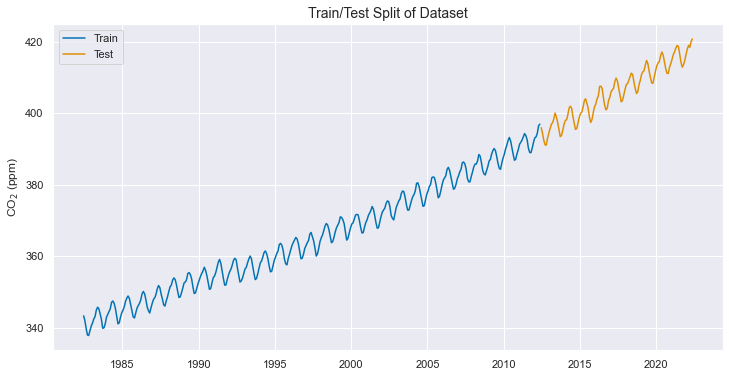

In [5]:
#Visualize the split
plt.figure(figsize=(12,6))
plt.plot(tr_mod.co2,label='Train');
plt.plot(te.co2,label='Test');
plt.legend();
plt.title('Train/Test Split of Dataset',size=14);
plt.ylabel('CO$_2$ (ppm)');

***
## Exploration  <a class="anchor" id="explore" />
***
*More exploration can be found in the supporting notebooks*


##### Target variable distribution

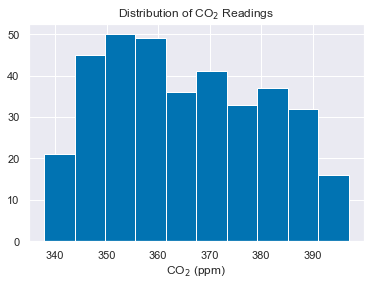

In [6]:
#distribution of values
tr_mod.co2.hist();
plt.title('Distribution of CO$_2$ Readings');
plt.xlabel('CO$_2$ (ppm)');

### Mauna Loa Observed Values

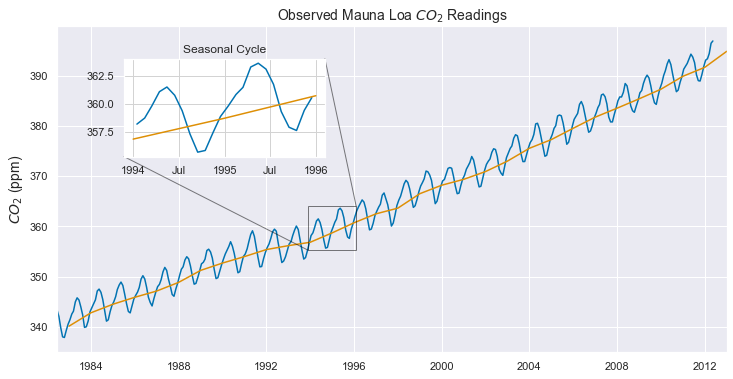

In [7]:
#Get yearly resampling
yrdf = tr_mod.resample('Y').mean()
#call inset plotting function
utils.mlo_inset_plot(tr_mod,yrdf)

<div class="alert alert-success"><b>Notes:</b> As we can see, the monthly data shows a distinct signal, whereas the yearly data smoothes out considerably and reveals an underlying trend.  Zooming in, we can see a clear seasonal cycle with CO<sub>2</sub> appearing to peak at the start of summer and bottom out in the fall.<br><br> <b>Next:</b> Let's pull out the seasonal variation and visualize that separately</div>

### Seasonal Decomposition 

##### Method 1 - Average monthly variance


In [8]:
#Create dataframe w/ average monthly reading
m1_season = pd.DataFrame(tr_mod.groupby('mn').co2.mean())
#rename that column
m1_season.rename(columns={'co2':'avg_co2'},inplace=True)
# Get monthly variance
m1_season['seas_var'] = m1_season.avg_co2 - tr_mod.co2.mean()
m1_season['mn'] = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

##### Method 2 - Using statsmodel.tsa.seasonal_decompose

In [9]:
#create the decomposition
decomp = sm.tsa.seasonal_decompose(tr_mod.co2,period=12)
#store pieces in dataframe
m2_season = pd.DataFrame({'y': decomp.observed,'trend': decomp.trend,
                          'seasonal': decomp.seasonal,'resid': decomp.resid})

##### Plot Seasonality

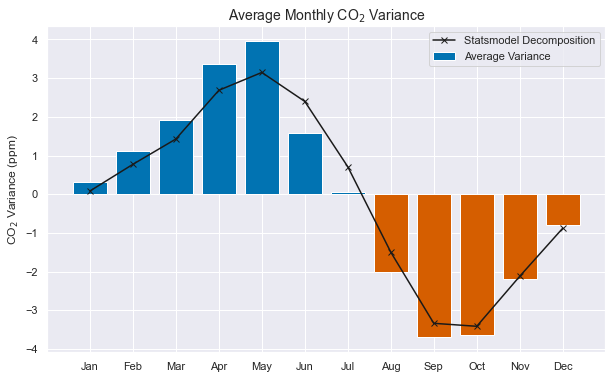

In [10]:
#Get random year we know has all months
last_full_year = str(tr_mod.index.year[-12])
#Plot seasonal variance
utils.plot_mlo_seasons(m1_season,m2_season,last_full_year)

<div class="alert alert-success"><b>Notes:</b> write notes here</div>

### Question 3?

<div class="alert alert-success"><b>Alt Question format</b></div>

In [11]:
#Do Visualizations

**Notes:**

### Exploration Summary:

> - 
> - 
> - 


***
## Modeling <a class="anchor" id="modeling" />
***
*More modeling can be found in the supporting notebooks*
    
**Model Evaluation:**

In [12]:
display(Markdown('### Alt question format using markdown'))
#Do Visualizations

### Alt question format using markdown

### Modeling Summary:

> - 
> - 
> - 


***
## Conclusion <a class="anchor" id="ConclusionC88" />
***

**Goal Recap:** 

**Key Findings:**
> - 
> -
> - 
> -

**Recommendations:**
> - 
> - 


**Next Steps:**
> - 
> -


***
## References <a class="anchor" id="Ref" />
***



1. <a class="anchor" id="1"> </a> C. D. Keeling, S. C. Piper, R. B. Bacastow, M. Wahlen, T. P. Whorf, M. Heimann, and H. A. Meijer, Exchanges of atmospheric CO2 and 13CO2 with the terrestrial biosphere and oceans from 1978 to 2000.  I. Global aspects, SIO Reference Series, No. 01-06, Scripps Institution of Oceanography, San Diego, 88 pages, 2001. [Back](#acq-prep)

2. <a class="anchor" id="2"> </a>
3. <a class="anchor" id="3"> </a>
4. <a class="anchor" id="4"> </a>
5. <a class="anchor" id="5"> </a>
6. <a class="anchor" id="6"> </a>

***
## Appendix:
***

*place for more complex graphs and implications relevant for next steps.  Or just add extra details that I don't want to take away from the rest of the report*